In [52]:
import os
import random
import time
import json
import warnings 
warnings.filterwarnings('ignore')

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import cv2

import numpy as np
import pandas as pd
from PIL import Image

# 전처리를 위한 라이브러리
from pycocotools.coco import COCO
import torchvision
import torchvision.transforms as transforms

import albumentations as A
from albumentations.pytorch import ToTensorV2

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt

plt.rcParams['axes.grid'] = False
batch_size=16

In [53]:
# pred1 = pd.read_csv("swin_base_ep11.csv")
pred1 = pd.read_csv("0.5304.csv")
pred2 = pd.read_csv("submission_ensemble_swin18_swin29.csv")

In [62]:
pred2 = pred2.drop("Unnamed: 0", axis = 1)

In [63]:
import matplotlib.patches as patches

In [64]:
test_dir = "/opt/ml/input/data/"

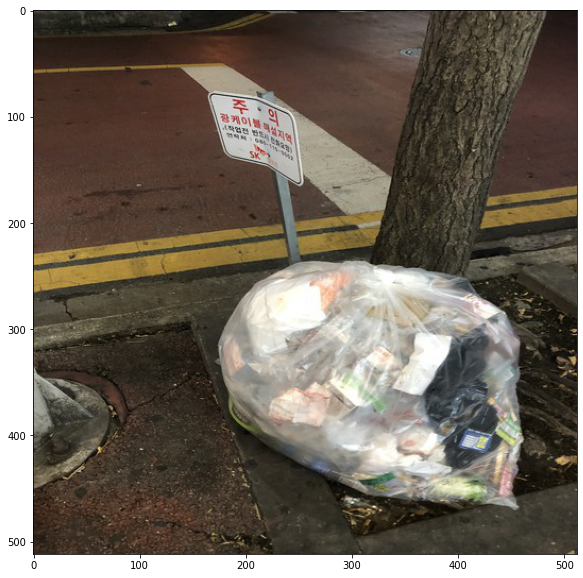

In [65]:
img_path = test_dir + prediction['image_id'][0]
test_img = Image.open(img_path)
img = np.array(test_img)
plt.figure(figsize = (10,10))
plt.imshow(img)

In [66]:
# bounding box 확인하기
color = ['red', 'blue', 'black', 'green', 'yellow', 'orange', 'cyan', 'gray', 'purple', 'tomato', 'skyblue']
classes = ["UNKNOWN", "General trash", "Paper", "Paper pack", "Metal", "Glass",
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]

In [71]:
def print_img(pred1, pred2, x):
    img_path = test_dir + pred1['image_id'][x]
#     test_img = cv2.imread(img_path)
    
    test_img1 = Image.open(img_path)
    test_img2 = Image.open(img_path)
    img1 = np.array(test_img1)
    img2 = np.array(test_img2)
#     test_img = cv2.resize(test_img, (512,512))
#     test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
#     print(test_img.shape)
    info1 = pred1.iloc[x][0]
    info1 = info1[:-1]
    info2 = pred2.iloc[x][0]
    info2 = info2[:-1]
    # def object_box(img, info):
    info1 = info1.split(" ")
    info2 = info2.split(" ")
    # info
    i = 0
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
    while i < len(info1) and i < len(info2):
        label1 = int(info1[i])
        score1 = float(info1[i+1])
        x_min1 = float(info1[i+2])
        y_min1 = float(info1[i+3])
        x_max1 = float(info1[i+4])
        y_max1 = float(info1[i+5])
        
        label2 = int(info2[i])
        score2 = float(info2[i+1])
        x_min2 = float(info2[i+2])
        y_min2 = float(info2[i+3])
        x_max2 = float(info2[i+4])
        y_max2 = float(info2[i+5])
        ax1.imshow(img1)
        ax1.add_patch(
             patches.Rectangle(
                (x_min1, y_min1),
                x_max1-x_min1,
                y_max1-y_min1,
                edgecolor = color[label1],
                facecolor = 'red',
                fill=False,
                linewidth=2
             ))
        ax1.text(x_min1, y_min1, classes[label1], fontsize=15, color='black', weight='bold')
        ax2.imshow(img2)
        ax2.add_patch(
             patches.Rectangle(
                (x_min2, y_min2),
                x_max2-x_min2,
                y_max2-y_min2,
                edgecolor = color[label2],
                facecolor = 'red',
                fill=False,
                linewidth=2
             ))
        ax2.text(x_min2, y_min2, classes[label2], fontsize=15, color='black', weight='bold')
        i += 6
#         break
    plt.show()

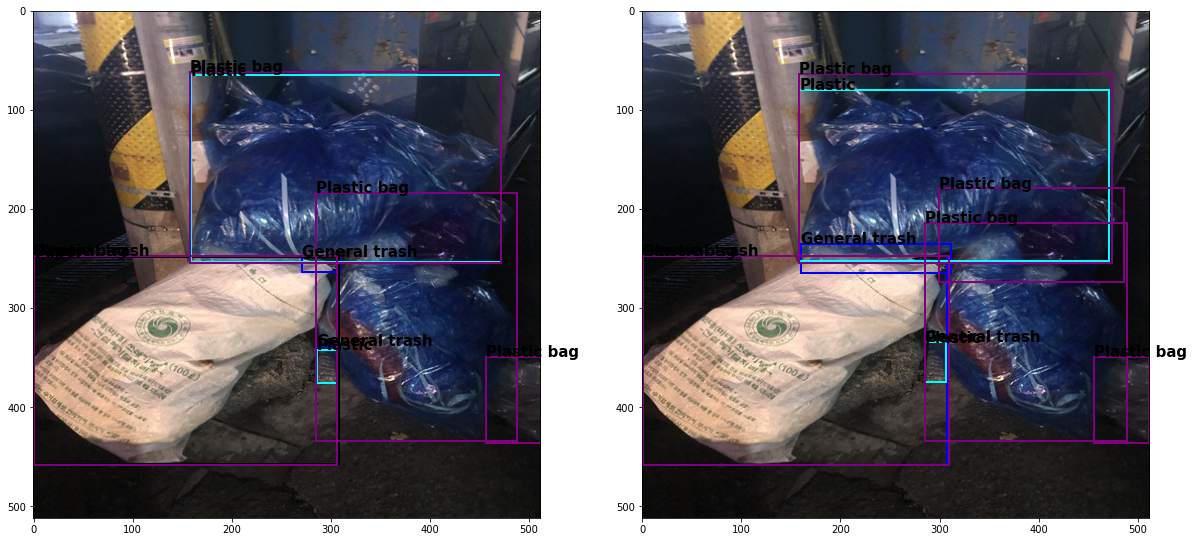

In [72]:
print_img(pred1, pred2, 1)